In [ ]:
# LLM Initialization
import os
#from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage

#load_dotenv()
if os.environ.get("GROQ_API_KEY"):
    print("API key exists")
else:
    raise ValueError("Groq API Key not found")


groq_api_key =os.environ.get("GROQ_API_KEY")
llm = ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

# Put all the imports at the top to make sure we have all modules in our notebook
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence, RunnableParallel, RunnableLambda


API key exists


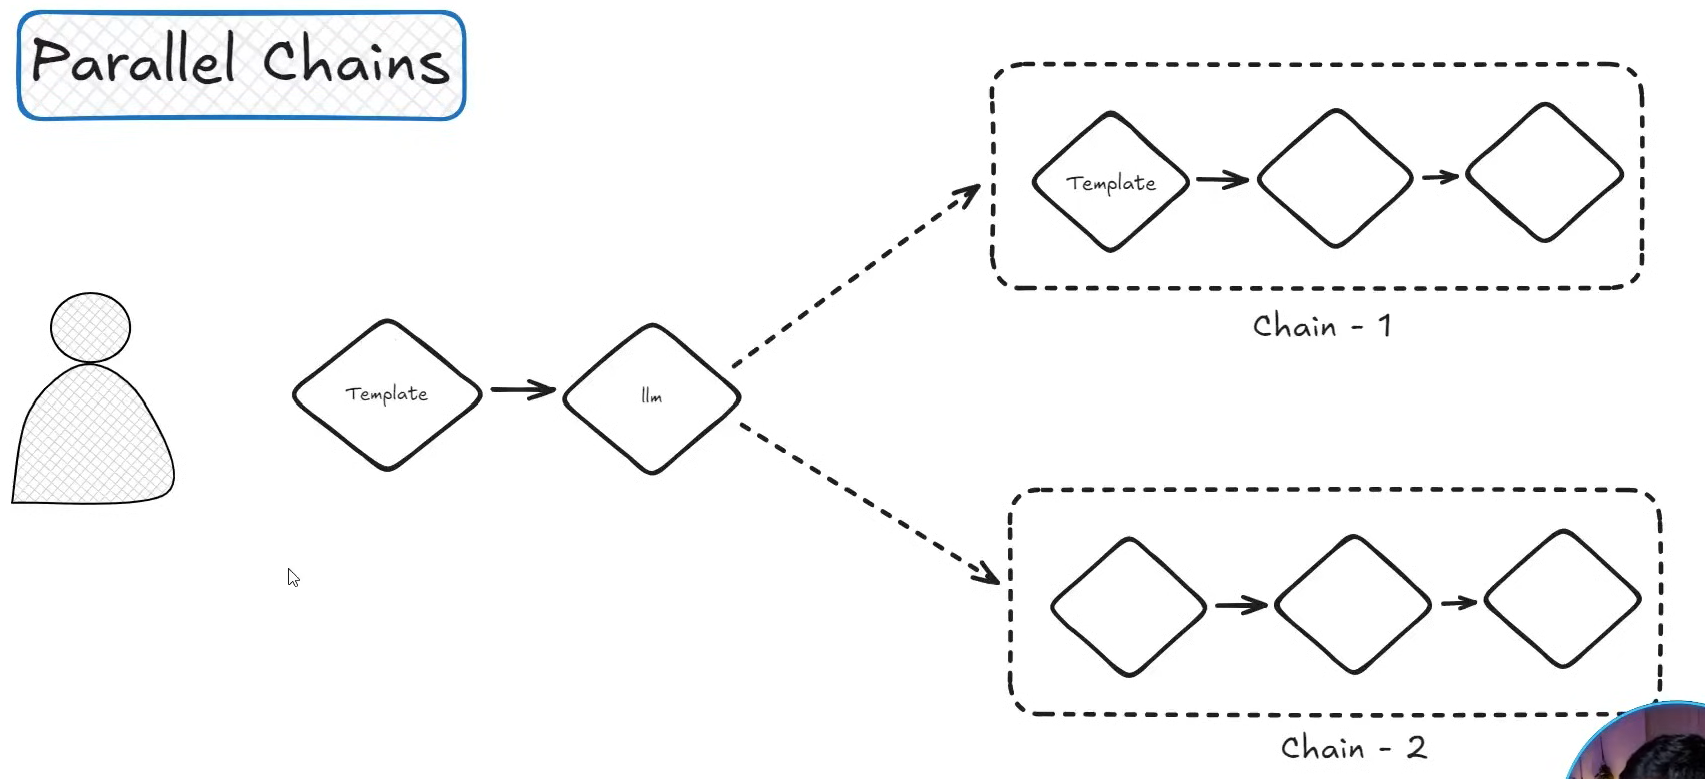

In [ ]:
# Task-1 [Prompt]
prompt_template=ChatPromptTemplate.from_messages([
("system","You are a helpful assistant"),
("human","{input}")
])

# Task-2 [LLM]
llm_groq=ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

# Task-3 [String Parser]
str_parser=StrOutputParser()



: 

**Parallel Chain 1:**

In [ ]:
# Task-1 [Prompt]
linkedin_prompt=ChatPromptTemplate.from_messages([
("system","You are a LinkedIn post assistant"),
("human","Create a post for the following text for Linkedin:{text}")
])

# Task-2 [LLM]
llm_groq=ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

# Task-3 [String Parser]
str_parser=StrOutputParser()

chain_linkedin=linkedin_prompt | llm_groq | str_parser


# TASK-4 [Custom Runnable to convert to dictionary]
def dictionary_maker(text: str) -> dict:
    return {"text": text}
dictionary_maker_ruunable = RunnableLambda(dictionary_maker)



: 

**Parallel Chain 2:**

In [ ]:
def insta_chain(text: dict):
    text=text['text']
    
    # TASK-1 [Prompt]
    insta_prompt=ChatPromptTemplate.from_messages([
    ("system","You are an Instagram post assistant"),   
    ("human","Create a post for the following text for Instagram:{text}")
    ])  

    # TASK-2 [LLM]
    llm_groq=ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

    # TASK-3 [String Parser]
    str_parser=StrOutputParser()

    chain_insta=insta_prompt | llm_groq | str_parser

    result_insta=chain_insta.invoke({"text":text})
    return result_insta
insta_chain_ruunable=RunnableLambda(insta_chain)

: 

**Final Orchestration:**

In [ ]:
final_chain=(
     prompt_template |
     llm_groq | 
     str_parser |
     dictionary_maker_ruunable |
     RunnableParallel(branches={"linkedin": chain_linkedin, "instagram": insta_chain_ruunable})
)

final_chain.invoke("KGF")

: 

**Chain as a Runnable:**

In [ ]:
# TASK -1 [Beautify Function]
def beautify(final_response: dict) -> dict:
        linkedin_response=final_response['branches']['linkedin']
        instagram_response=final_response['branches']['instagram']
        return {"linkedin":linkedin_response,"instagram":instagram_response}
beautify_ruunable=RunnableLambda(beautify)
# TASK -2 [Final Chain with Beautify]
beautify_chain=final_chain | beautify_ruunable
beautify_chain.invoke("Pushpa")
     

: 